> **Copyright &copy; 2020 CertifAI Sdn. Bhd.**<br>
 **Copyright &copy; 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). \
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**> 

# Requirement
You should complete the LSTM tutorial before starting the CNN tutorial. This is because most of the function used will be based on `data_module.py` and `deep_learning_module.py`

Please proceed to the LSTM notebook if you dint complete it before  <br>

1. [04 - LSTM-Univariate-Single-Step](./04%20-%20LSTM-Univariate-Single-Step.ipynb)
2. [04 - LSTM-Univariate Multi-Step.ipynb](./04%20-%20LSTM-Univariate-Multi-Step.ipynb)
3. [04 - LSTM-Multivariate-Input-Univariate-Output-Single-Step](./04%20-%20LSTM-Multivariate-Input-Univariate-Output-Single-Step.ipynb)<br>
4. [04 - LSTM-Multivariate-Input-Univariate-Output-Multi-Step](./04%20-%20LSTM-Multivariate-Input-Univariate-Output-Multi-Step.ipynb)<br>

## Univariate CNN Single - Step
This tutorial is to demonstrate the process to build CNN for the Univariate Input, Univariate Output for Single Step. <br>
It consists of 2 major part which are :<br>

Part 1 - The Demonstration of Building CNN using Synthetic data <br>
Part 2 - Exercise of building CNN using minimum daily temperatures in  city Melbourne, Australia. <br>

>**Instruction** :<br>
The instructor will code with you and guide you in the process of building the CNN model using Synthetic data.<br>
You are required to complete the exercise after the demonstration.<br>

## What will we accomplish?
First, we will show the step in building the CNN :

Step 1. Data Preparation (Data Splitting,Data Sequencing,Data Normalization and Batching the Data)<br>
Step 2. Model Configuration for CNN<br>
Step 3. Train the model<br>
Step 4. Validate the model using graph<br>
Step 5. Evaluation Metrics such as MSE<br>
Step 6. Plot the forecast result<br>



First, let's import the package needed

In [2]:
# import packages needed
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
import math
import matplotlib.pyplot as plt
from torchsummaryX import summary

# To auto load the customise module
%load_ext autoreload
%autoreload 2
import deep_learning_module
import data_module

# Part 1 : Demonstration of Building CNN using Synthetic data
## Hyperparameter
Define the hyperparameter that needs to tune the model 

In [3]:
split_ratio = 0.70
num_epochs = 300
window_size = 6
batch_size = 10
learning_rate = 0.001
n_step = 1 


# Step 1 : Data Preparation
We create synthetic data to make sure the model is created correctly and having the ability to perform the forecasting. <br>

1. First, we will create a sequence of data with `np.array`.
2. Then, we will assign a date to the sequence of data with `pd.date_range` and store it to series data by using `pd.Series`.

In [4]:
# Create Synthetic Data
univariate_series = np.array([x for x in range(0, 400, 10)])
print(univariate_series.shape)
univariate_series

(40,)


array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390])

In [5]:
# Create time index for Synthetic Data
univariate_series =pd.Series(univariate_series,pd.date_range("1/1/2020",
                                                             periods=len(univariate_series),
                                                            freq='D'))
univariate_series.head()

2020-01-01     0
2020-01-02    10
2020-01-03    20
2020-01-04    30
2020-01-05    40
Freq: D, dtype: int32

## Data Visualization
Data visualization is important for us to visualize the pattern of data such as trend and seasonality. As the graph below, it is shown that it is an increasing trend in data

>**Instruction** : <br>
Plot the graph using `univariate_series.plot` with the title `Synthetic Data"`

Text(0.5, 1.0, 'Synthetic Data')

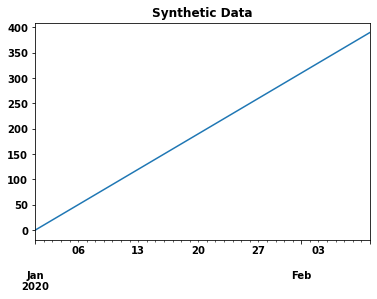

In [6]:
### BEGIN SOLUTION

univariate_series.plot()
plt.title("Synthetic Data")

### BEGIN SOLUTION

## Data Splitting
In Deep Learning, we will split the data into training and test dataset.The training data is used to train the model where the test data is used to validate the performance of the model
>**Instruction** : <br>
Split the data by indexing. Remember to split the time index for later use

In [7]:
# Split the data with ratio as state in hyperparameter
split_data = round(len(univariate_series)*split_ratio)
split_data

28

In [8]:
### BEGIN SOLUTION
# Split data by indexing 
train_data = univariate_series.values[:split_data]
test_data = univariate_series.values[split_data:]
train_time = univariate_series.index[:split_data]
test_time = univariate_series.index[split_data:]
### END SOLUTION
print("train_data_shape")
print(train_data.shape)
print("test_data_shape")
print(test_data.shape)

train_data_shape
(28,)
test_data_shape
(12,)


## Data Standardization
Standardize the data to have a 0 mean and unit variance to make our model converge faster
>**Instruction** : <br>
Use `StandardScaler()` as the scaler for the data. Create scaled data using `scaler.transform` and store in respective `train_data_standard` and `test_data_standard`

In [9]:
scaler = StandardScaler().fit(train_data.reshape(-1, 1))
train_data_standard = scaler.transform(train_data.reshape(-1, 1))

test_data_standard = scaler.transform(test_data.reshape(-1, 1))

## Data Sequencing
Sequencing the data by taking in the univariate series into `x-feature` and `y-label`<br>
<img src = "../../picture/Data Sequencing in Univariate Single Step.png"  width="300" height  ="300" align="center" />



In [10]:
trainX, trainY = data_module.univariate_single_step(train_data_standard, window_size)
testX, testY = data_module.univariate_single_step(test_data_standard, window_size)
print(f"trainX shape:{trainX.shape} trainY shape:{trainY.shape}\n")
print(f"testX shape:{testX.shape} testX shape:{testY.shape}")

trainX shape:(22, 6, 1) trainY shape:(22, 1)

testX shape:(6, 6, 1) testX shape:(6, 1)


In [11]:
trainY = trainY.reshape(trainY.shape[0],n_step,1)
testY = testY.reshape(testY.shape[0],n_step,1)
print(f"trainY shape:{trainY.shape}")
print(f"testY shape:{testY.shape}")

trainY shape:(22, 1, 1)
testY shape:(6, 1, 1)


## Data Transform
Data need to transform from `NumPy` to `PyTorch` tensor before feeding into the CNN model.

>**Instruction** : <br>
Use `data_module.key_assign` to assign the key and `data_module.transform` to transform the data.

In [12]:
### BEGIN SOLUTION
train_data_dict ,test_data_dict = data_module.key_assign(trainingX = trainX  , 
                       testingX = testX, 
                       trainingY = trainY, 
                       testingY = testY)
### END SOLUTION

### BEGIN SOLUTION
train_data_dict ,test_data_dict = data_module.transform(train_data_dict ,test_data_dict)
### END SOLUTION

In [13]:
data_module.sanity_check(train_data_dict , test_data_dict)

train_data_x_feature shape : torch.Size([22, 6, 1])
train_data_y_label shape : torch.Size([22, 1, 1])
test_data_x_feature shape : torch.Size([6, 6, 1])
test_data_y_label shape : torch.Size([6, 1, 1])


## Data Transpose 
You are required to transpose the x-feature data in such a way that : <br>
>`(batch_size, number_of_features, sequence_length)`.

This is because CNN requires the input shape as `(batch_size, number_of_features, sequence_length)` .Hence, we will create and function that accepts the dictionary data of train data and test data as input. Using `torch.transpose()` to transpose the x-feature for both train data and test data.Return it as dictionary data.

In [14]:
### BEGIN SOLUTION
def transpose(train_data_dict,test_data_dict):
    train_data_dict['train_data_x_feature'] = torch.transpose(train_data_dict['train_data_x_feature'],1,2)
    test_data_dict['test_data_x_feature'] = torch.transpose(test_data_dict['test_data_x_feature'],1,2)
    return train_data_dict , test_data_dict

train_data_dict , test_data_dict= transpose(train_data_dict,test_data_dict)
### END SOLUTION    

In [15]:
data_module.sanity_check(train_data_dict , test_data_dict)

train_data_x_feature shape : torch.Size([22, 1, 6])
train_data_y_label shape : torch.Size([22, 1, 1])
test_data_x_feature shape : torch.Size([6, 1, 6])
test_data_y_label shape : torch.Size([6, 1, 1])


## Data Iterator
Iterator is created to allow the data to separate into several batches to fasten the training process
>**Instruction** : <br>
Use `data_module.iterator` to create data iterator.

In [16]:
### BEGIN SOLUTION
train_iter , test_iter = data_module.iterator(train_data_dict ,test_data_dict,batch_size = batch_size)
### END SOLUTION

# Step 2 :  CNN Model Configuration
The method uses to create the model is called the PyTorch subclass method. <br>

It consists of 2 part :<br>
1. The first part allows the user to define the structure of the model such as the number of convolution layer , the number of unit in each convolution layer
2. The second part of the method consists of forward() method, which allows the user to control the flow of input data and output data. 

>**How the input 1D CNN look likes?**<br> 
The CNN input is one-dimensional input, with the shape of `(batch size, channel, Length)`:<br>
**Batch size** = size of training batch; <br>
**Channel** = number of input channels(the number of feature in our time series data);<br>
**Length** =  length of input(sequence length), because it is one-dimensional input, it has the only Length. <br>
The following figure shows a one-dimensional input consisting of three channels:<br>
<img src = "https://programmer.group/images/article/7efd88a8dec9523cfe060724a9369346.jpg"  width="500" height  ="500" />

>**How kernel is stride ?**
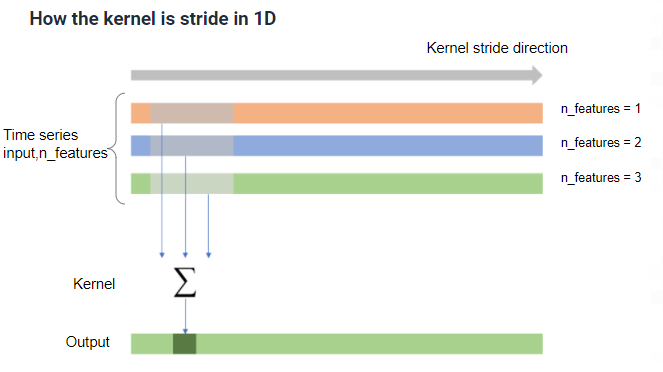

>**Pipeline of 1D CNN** <br>
Convolution -> ReLU -> Pooling -> Convolution -> ReLU -> Pooling -> Flatten -> FC 1 -> ReLU -> FC 2 -> Output
<img src = "https://static.packt-cdn.com/products/9781789618518/graphics/assets/db500cc0-429f-4b22-90ca-6e5b7119f386.png"  width="500" height  ="500" />

>**How to initialize CNN ?**<br>
    1. `nn.Conv1d(number of feature, number of output channel, kernel_size)`<br>
    2. `nn.MaxPool1d(kernel_size)`<br>
    3. `nn.Conv1d(number of output channel from previous convolution layer, number of output channel, kernel_size)`<br>
    4. `nn.AdaptiveMaxPool1d(1)` is use to make sure the return is same size with batch size <br>
    5. `nn.Linear(number of output channel from previous convolution layer,number of output channel)`<br>
    6. `nn.Linear(number of output channel from previous convolution layer,n_step)`<br>

>**What is `nn.AdaptiveMaxPool1d`?**<br>
    It is a type of pooling layer that make sure it is return base on the target output length H ,
    Example : `nn.AdaptiveMaxPool1d(H)` it will return `output length = 1` if `H = 1`
    

Layer|     Kernel Shape|  Output Shape| Params| Mult-Adds|
---|---|---|---|---|                                              
0_conv1 |  [5, 30, 3]|  [10, 30, 18]|  480.0|      8.1k|
1_poo1 |            -|   [10, 30, 9]|      -|         -|
2_conv2 | [30, 20, 2]|   [10, 20, 8]|  1.22k|      9.6k|
<span style='background:yellow'>3_pool2 </span>|           -|   <span style='background:yellow'>[10, 20, 1]</span>|      -|         -|
<span style='background:red'>4_fc1</span>|[20, 10]|<span style='background:red'>[10, 10]</span>|210.0|     200.0|</span>
5_fc2   |      [10, 1]|       [10, 1]|   11.0|      10.0|

<center><b>With AdaptiveMaxPool1d</b></center><br>



Layer|        Kernel Shape|  Output Shape| Params| Mult-Adds
---|---|---|---|---|  
0_conv1|   [5, 30, 3]|  [10, 30, 18]|  480.0|      8.1k|
1_poo1|             -|   [10, 30, 9]|      -|         -|
2_conv2|  [30, 20, 2]|   [10, 20, 8]|  1.22k|      9.6k|
<span style='background:red'>3_fc1</span>|       [20, 10]|      <span style='background:red'>[80, 10]</span>|  210.0|     200.0|
4_fc2|        [10, 1]|       [80, 1]|   11.0|      10.0|

<center><b>Without AdaptiveMaxPool1d</b></center>

>**Instruction** : <br>
Follow the instructor guidance to know how to configure the 1D CNN.

In [17]:
class CNN(nn.Module):

    def __init__(self,n_feature,n_step):
        super(CNN, self).__init__()
        ### BEGIN SOLUTION
        self.n_feature = n_feature
        self.n_step = n_step

        # Conv1d in_channels is base on num time series
        # Input:(N,C,Lin) Output : (N,C,Lout)
        self.conv1 = nn.Conv1d(in_channels = n_feature, out_channels = 30, kernel_size = 3)
        
        # For example Input:(N,C,Lin) Output : (N,C,Lout)
        self.poo1 = nn.MaxPool1d(kernel_size=2)
        
        self.conv2 = nn.Conv1d(in_channels = 30, out_channels = 20, kernel_size = 2)
        
        # AdaptiveMaxPool1d use to make sure it always will output  = 1 ,to make sure return the correct batch size 
        self.pool2 = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(20, 10)
        self.fc2 = nn.Linear(10,n_step)
        ### END SOLUTION

    def forward(self, x):
        ### BEGIN SOLUTION
        x = F.relu(self.conv1(x))
        x = self.poo1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,20)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        ### END SOLUTION

        return x


## Input Model
The number of features and number of step feed as the attribute for the model. The other attribute such as `kernel_size` , `in_channels` and `out_channels` for each convolution layer need to configure in the network configuration by the user


>**Instruction** : <br>
Follow the instructor guidance to know how to initiate the model.

In [18]:
# seed
torch.manual_seed(123)
### BEGIN SOLUTION
n_feature = train_data_dict['train_data_x_feature'].shape[1]

# Input the attribute need by the model 
model = CNN(n_feature = n_feature,n_step = n_step )

# Define the optimizer (Here we use SGD as our optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Define the loss function (Here we use MSE as the loss function)
loss_fn = nn.MSELoss()

### END SOLUTION

In [19]:
seq_length = train_data_dict['train_data_x_feature'].shape[2]
inputs = torch.zeros((batch_size,n_feature ,seq_length),dtype=torch.float) # batch size ,input_dim ,seq_length
print(summary(model,inputs))

        Kernel Shape Output Shape Params Mult-Adds
Layer                                             
0_conv1   [1, 30, 3]  [10, 30, 4]  120.0     360.0
1_poo1             -  [10, 30, 2]      -         -
2_conv2  [30, 20, 2]  [10, 20, 1]  1.22k      1.2k
3_pool2            -  [10, 20, 1]      -         -
4_fc1       [20, 10]     [10, 10]  210.0     200.0
5_fc2        [10, 1]      [10, 1]   11.0      10.0
----------------------------------------------------
                      Totals
Total params          1.561k
Trainable params      1.561k
Non-trainable params     0.0
Mult-Adds              1.77k
        Kernel Shape Output Shape  Params  Mult-Adds
Layer                                               
0_conv1   [1, 30, 3]  [10, 30, 4]   120.0      360.0
1_poo1             -  [10, 30, 2]     NaN        NaN
2_conv2  [30, 20, 2]  [10, 20, 1]  1220.0     1200.0
3_pool2            -  [10, 20, 1]     NaN        NaN
4_fc1       [20, 10]     [10, 10]   210.0      200.0
5_fc2        [10, 1]   

In [20]:
# seed
torch.manual_seed(123)

#  Xavier Weight Initialize 
def weights_init(m):
    if isinstance(m, nn.Conv1d):
        nn.init.xavier_uniform_(m.weight.data)
        
model.apply(weights_init)

CNN(
  (conv1): Conv1d(1, 30, kernel_size=(3,), stride=(1,))
  (poo1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(30, 20, kernel_size=(2,), stride=(1,))
  (pool2): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

# Step 3 : Training

In [21]:
# seed
torch.manual_seed(123)
# Start Training
train_loss, val_loss = deep_learning_module.training(num_epochs, train_iter, test_iter, optimizer, loss_fn, model)

# Step 4 : Validation 
A learning curve is plotted to define how well the data is fitting the model 

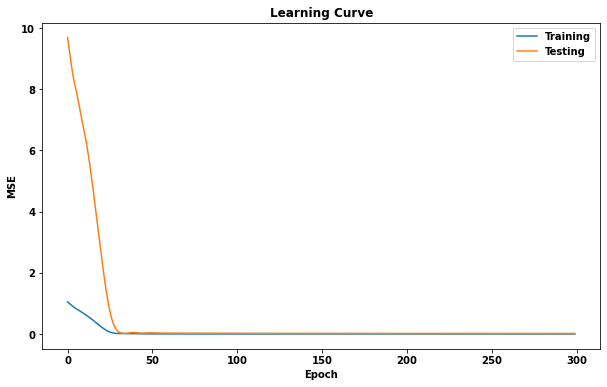

Epoch : 0 , training loss : 1.049306352030147 , validation loss : 9.688887596130371
Epoch : 1 , training loss : 0.9997449977831407 , validation loss : 9.28180980682373
Epoch : 2 , training loss : 0.953354074196382 , validation loss : 8.885376930236816
Epoch : 3 , training loss : 0.9087348770011555 , validation loss : 8.507980346679688
Epoch : 4 , training loss : 0.864604418927973 , validation loss : 8.223601341247559
Epoch : 5 , training loss : 0.825545457276431 , validation loss : 7.973207473754883
Epoch : 6 , training loss : 0.7931070788340135 , validation loss : 7.705576419830322
Epoch : 7 , training loss : 0.7602277777411721 , validation loss : 7.421520709991455
Epoch : 8 , training loss : 0.7261084738102827 , validation loss : 7.121105194091797
Epoch : 9 , training loss : 0.6904032128778371 , validation loss : 6.8446221351623535
Epoch : 10 , training loss : 0.653094772588123 , validation loss : 6.579329013824463
Epoch : 11 , training loss : 0.6150242022492669 , validation loss : 6

In [22]:
data_module.learning_curve(num_epochs = num_epochs , train_loss = train_loss , val_loss = val_loss )


# Step 5 : Evaluation
This section is to inference the model by feeding in testing data and determine the output forecast value and calculate the RMSE.
>**Instruction** : <br>
Follow the instructor guidance to use the function in `data_module.py` in each section

It consists of 4 sections :

Section 1 : Feed in the train and test data to the model <br>
Section 2 : Reshape both to the original data dimension <br> 
Section 3 : Invert the scaling back to the original data value <br>
Section 4 : Calculate the RMSE of train and test data

In [23]:
# Section 1 : make predictions
### BEGIN SOLUTION
with torch.no_grad():
    y_train_prediction = model(train_data_dict['train_data_x_feature'])
    y_test_prediction = model(test_data_dict['test_data_x_feature'])
### END SOLUTION    

In [24]:
# Assign evaluation key
### BEGIN SOLUTION
prediction , output = data_module.key_assign_evaluation(y_train_prediction,
    y_test_prediction,
    train_data_dict,
    test_data_dict)
### END SOLUTION

# Section 2 : Reshape to original data
# Squeeze the output dimension
### BEGIN SOLUTION
output_data = data_module.squeeze_dimension(output)
### END SOLUTION

In [25]:
data_module.sanity_check(data_1 = output_data,data_2 = {})

train_data_output shape : torch.Size([22, 1])
test_data_output shape : torch.Size([6, 1])


In [26]:
# Section 3 : Invert predictions
### BEGIN SOLUTION
prediction = data_module.inverse_scaler(prediction,scaler)
output_data  = data_module.inverse_scaler(output_data ,scaler)
### END SOLUTION

In [27]:
data_module.sanity_check(data_1 = prediction,data_2 = output_data )

train_data_prediction shape : (22, 1)
test_data_prediction shape : (6, 1)
train_data_output shape : (22, 1)
test_data_output shape : (6, 1)


In [28]:
# List the forecast value
data_module.list_forecast_value(output_data,prediction) 

Test Data			Forecast
[340.]		[332.73694]
[350.]		[341.65363]
[360.]		[350.57953]
[370.]		[359.31195]
[380.]		[367.97327]
[390.]		[376.63464]


In [29]:
# Section 4 : Calculate the RMSE of train and test data
### BEGIN SOLUTION
trainScore,testScore = data_module.rmse(prediction,output_data)
### END SOLUTION
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.32 RMSE
Test Score: 10.40 RMSE


# Step 6 : Forecast Plot

Text(0.5, 0, 'Date')

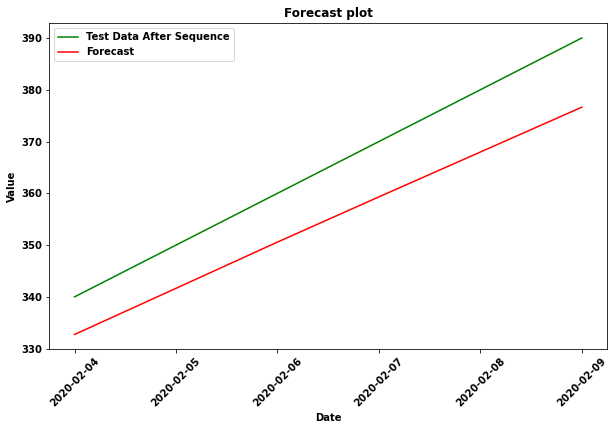

In [60]:
data_module.single_step_plot(original_test_data = test_data,
                            sequence_test_data = output_data['test_data_output'],
                            forecast_data = prediction['test_data_prediction'],
                            test_time = test_time,
                            window_size =  window_size,
                            original_plot=False,
                            multivariate=False)
plt.xlabel("Date")

# Part 2 : Exercise for Univariate 
## Task : Use CNN to predict the temperature for Melbourne

### Introduction
You are given a set of dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.The units are in degrees Celsius and there are 3650 observations.

### Data Sources :
[The source of the data is credited as the Australian Bureau of Meteorology.](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv)

## Hyperparameter
>**Instruction** : <br>
You are required to fill the `None` with a suitable value to make the model converge

>**Expected Result** : <br>
Train Score <= 10 RMSE<br>
Test Score <= 10 RMSE<br>

In [31]:
#Hyperparameter
num_epochs_temperature = 100
batch_size_temperature = 30
window_size_temperature = 12
learning_rate_temperature = 0.001
n_step_temperature = 1 
#seed
torch.manual_seed(123)

# Step 1 : Data Preparation
>**Instruction** : <br>
Read the `CSV` file using `pd.read_csv`<br>
Your file path `https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv`

>**Expected Result** : <br>
Example of the first 5 data

---|	Date|	Temp
---|---|---
0|	1981-01-01|	20.7
1|	1981-01-02|	17.9
2|	1981-01-03|	18.8
3|	1981-01-04|	14.6
4|	1981-01-05|	15.8

In [32]:
# Read CSV file 
### BEGIN SOLUTION
temperature = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
### END SOLUTION
temperature.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


>**Instruction** : <br>
Covert the `Date` by using `pd.to_datetime`
Set the index as 'Date' using `df.set_index`

>**Expected Result** : <br>
Example of the first 5 data

Date|	Temp
---|---
1981-01-01|	20.7
1981-01-02|	17.9
1981-01-03|	18.8
1981-01-04|	14.6
1981-01-05|	15.8

In [33]:
### BEGIN SOLUTION
temperature['Date'] = pd.to_datetime(temperature['Date'])
temperature = temperature.set_index('Date')
### END SOLUTION
temperature.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


>**Instruction** : <br>
Save the data in `Series` format using `pd.Series`

>**Expected Result** : <br>
Example of the first 5 data

Date|---
---|---
1981-01-01|    20.7
1981-01-02|    17.9
1981-01-03|    18.8
1981-01-04|    14.6
1981-01-05|    15.8

In [34]:
### BEGIN SOLUTION
temperature_ts = pd.Series(temperature['Temp'])
### END SOLUTION
temperature_ts.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

## Data Visualization
Data visualization is important for us to visualize the pattern of data such as trend and seasonality. As the graph below, it is shown that it is an increasing trend in data
>**Instruction** : <br>
Use `df.plot()` to plot the temperature_ts

<AxesSubplot:xlabel='Date'>

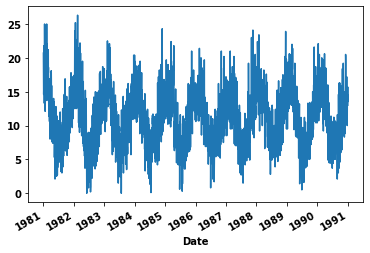

In [35]:
### BEGIN SOLUTION
temperature_ts.plot()
### END SOLUTION

## Data Splitting

In [36]:
# Create split data ratio
split_data = 0.6
split_ratio = round(len(temperature_ts)*split_data)

In [58]:
# Split data by indexing 
train_data_temperature= temperature_ts[:split_ratio]
test_data_temperature = temperature_ts[split_ratio:]
train_time_temperature = temperature_ts.index[:split_ratio ]
test_time_temperature = temperature_ts.index[split_ratio:]
print("train_data_shampoo_shape")
print(train_data_temperature.shape)
print("test_data_shampoo_shape")
print(test_data_temperature.shape)

train_data_shampoo_shape
(2190,)
test_data_shampoo_shape
(1460,)


## Data Standardization
>**Instruction** : <br>
Use `StandardScaler()` to  standardize the data, save your data scaler into `scaler_temperature`.<br>
Train and test scaled data into `scaler_train_shampoo_data ` and `test_data_scaled_temperature`.<br>

Example :<br>
`train_data_scaled_temperature = scaler_temperature.transform(train_data_temperature.values.reshape(-1, 1))`

In [38]:
### BEGIN SOLUTION
scaler_temperature = StandardScaler().fit(train_data_temperature.values.reshape(-1, 1))
train_data_scaled_temperature = scaler_temperature.transform(train_data_temperature.values.reshape(-1, 1))
test_data_scaled_temperature = scaler_temperature.transform(test_data_temperature.values.reshape((-1, 1)))
### END SOLUTION

## Data Sequencing 
>**Instruction** : <br>
Use `data_module.univariate_single_step` to perform window sliding by taking the scaled data and save your data into respective `x` and `y` variable.<br>

Example :<br>
`trainX_temperature ,trainY_temperature =  data_module.univariate_single_step(train_data_scaled_temperature,
                                                                             window_size_temperature)`

In [39]:
### BEGIN SOLUTION
trainX_temperature ,trainY_temperature =  data_module.univariate_single_step(train_data_scaled_temperature,
                                                                             window_size_temperature)

testX_temperature , testY_temperature = data_module.univariate_single_step(test_data_scaled_temperature,
                                                                           window_size_temperature)
### END SOLUTION
print(f"trainX shape:{trainX_temperature.shape} trainY shape:{trainY_temperature.shape}\n")
print(f"testX shape:{testX_temperature.shape} testX shape:{testY_temperature.shape}")

trainX shape:(2178, 12, 1) trainY shape:(2178, 1)

testX shape:(1448, 12, 1) testX shape:(1448, 1)


In [40]:
trainY_temperature= trainY_temperature.reshape(trainY_temperature.shape[0],n_step,1)
testY_temperature= testY_temperature.reshape(testY_temperature.shape[0],n_step,1)
print(f"trainY shape:{trainY_temperature.shape}")
print(f"testY shape:{testY_temperature.shape}")

trainY shape:(2178, 1, 1)
testY shape:(1448, 1, 1)


## Data Transform
Data need to transform from NumPy to PyTorch tensor before feeding into the model  
>**Instruction** : <br>
Use `data_module.key_assign` to assign the key and `data_module.transform` to transform the data.

In [41]:
# Key Assign 
### BEGIN SOLUTION
train_data_dict_temperature ,test_data_dict_temperature = data_module.key_assign(trainingX = trainX_temperature  , 
                       testingX = testX_temperature, 
                       trainingY = trainY_temperature, 
                       testingY = testY_temperature)
### END SOLUTION

# Transform data
### BEGIN SOLUTION
train_data_dict_temperature ,test_data_dict_temperature= data_module.transform(train_data_dict_temperature ,
                                                                          test_data_dict_temperature)
### END SOLUTION

In [42]:
data_module.sanity_check(train_data_dict_temperature , test_data_dict_temperature)

train_data_x_feature shape : torch.Size([2178, 12, 1])
train_data_y_label shape : torch.Size([2178, 1, 1])
test_data_x_feature shape : torch.Size([1448, 12, 1])
test_data_y_label shape : torch.Size([1448, 1, 1])


## Data Transpose 
You are required to transpose the x-feature data in such a way that : <br>
>`(batch_size, number_of_features, sequence_length)`.

>**Instruction** : <br>
Use `transpose` function in part 1 to transpose the suitable input data for CNN model.

In [43]:
### BEGIN SOLUTION
train_data_dict_temperature , test_data_dict_temperature = transpose(train_data_dict_temperature,
                                                                     test_data_dict_temperature)
### END SOLUTION

## Data Iterator
Iterator is created to allow the data to separate into several batches to fasten the training process
>**Instruction** : <br>
Use `data_module.iterator` to create data iterator.

In [44]:
# Create Iterator
### BEGIN SOLUTION
train_iter_temperature , test_iter_temperature = data_module.iterator(train_data_dict_temperature ,
                                                                      test_data_dict_temperature,
                                                                      batch_size = batch_size_temperature)
### END SOLUTION

## Input Model



>**Instruction** : <br>
Use the `CNN` configuration in part 1 as the model for the temperature data.Use `Adam` as the optimizer and `MSE` as the loss function.

In [45]:
# seed
torch.manual_seed(123)
### BEGIN SOLUTION
n_feature_temperature = train_data_dict_temperature['train_data_x_feature'].shape[1]

# Input the attribute need by the model 
model_temperature = CNN(n_feature = n_feature_temperature,
                        n_step = n_step_temperature )

# Define the optimizer (Here we use SGD as our optimizer)
optimizer_temperature = torch.optim.Adam(model_temperature.parameters(), lr=learning_rate_temperature)
# Define the loss function (Here we use MSE as the loss function)
loss_fn_temperature = nn.MSELoss()
### END SOLUTION

# Step 3 : Training

In [59]:
seq_length_temperature = train_data_dict_temperature['train_data_x_feature'].shape[2]

# batch size ,input_dim ,seq_length
inputs = torch.zeros((batch_size_temperature,
                      n_feature_temperature ,
                      seq_length_temperature),dtype=torch.float) 

print(summary(model_temperature,inputs))

        Kernel Shape  Output Shape Params Mult-Adds
Layer                                              
0_conv1   [1, 30, 3]  [30, 30, 10]  120.0     900.0
1_poo1             -   [30, 30, 5]      -         -
2_conv2  [30, 20, 2]   [30, 20, 4]  1.22k      4.8k
3_pool2            -   [30, 20, 1]      -         -
4_fc1       [20, 10]      [30, 10]  210.0     200.0
5_fc2        [10, 1]       [30, 1]   11.0      10.0
-----------------------------------------------------
                      Totals
Total params          1.561k
Trainable params      1.561k
Non-trainable params     0.0
Mult-Adds              5.91k
        Kernel Shape  Output Shape  Params  Mult-Adds
Layer                                                
0_conv1   [1, 30, 3]  [30, 30, 10]   120.0      900.0
1_poo1             -   [30, 30, 5]     NaN        NaN
2_conv2  [30, 20, 2]   [30, 20, 4]  1220.0     4800.0
3_pool2            -   [30, 20, 1]     NaN        NaN
4_fc1       [20, 10]      [30, 10]   210.0      200.0
5_fc2  

In [48]:
# seed
torch.manual_seed(123)

# Xavier weight intialization
def weights_init(m):
    if isinstance(m, nn.Conv1d):
        nn.init.xavier_uniform_(m.weight.data)
        
model_temperature.apply(weights_init)

CNN(
  (conv1): Conv1d(1, 30, kernel_size=(3,), stride=(1,))
  (poo1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(30, 20, kernel_size=(2,), stride=(1,))
  (pool2): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

# Step 3 : Training

In [49]:
# seed
torch.manual_seed(123)
# Start Training 
train_loss_temperature,val_loss_temperature = deep_learning_module.training(num_epochs_temperature,
                                                                            train_iter_temperature,
                                                                            test_iter_temperature,
                                                                            optimizer_temperature,
                                                                            loss_fn_temperature,
                                                                            model_temperature)

# Step 4 : Validation
>**Instruction**<br> 
Plot the learning curve to evaluate the loss of each epoch 

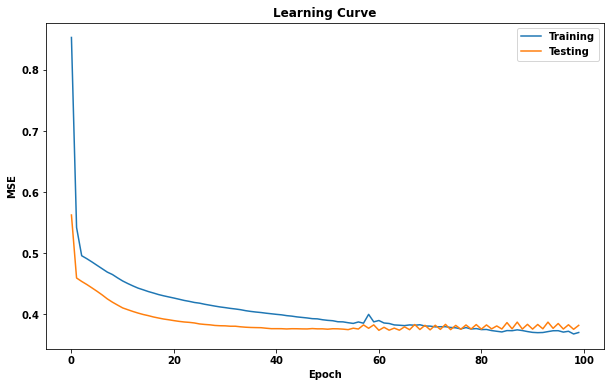

Epoch : 0 , training loss : 0.8530768274275724 , validation loss : 0.562388303344915
Epoch : 1 , training loss : 0.54197371051167 , validation loss : 0.45925654262016163
Epoch : 2 , training loss : 0.49569074495518506 , validation loss : 0.45360941046756276
Epoch : 3 , training loss : 0.4908394919036177 , validation loss : 0.44858686963497607
Epoch : 4 , training loss : 0.485527635277467 , validation loss : 0.4430706833607584
Epoch : 5 , training loss : 0.4799415477790123 , validation loss : 0.4374432344380663
Epoch : 6 , training loss : 0.47441257454311225 , validation loss : 0.43150170433504803
Epoch : 7 , training loss : 0.4688749933209958 , validation loss : 0.4250304302334456
Epoch : 8 , training loss : 0.4649086824051276 , validation loss : 0.41964446072008726
Epoch : 9 , training loss : 0.4594572251739581 , validation loss : 0.41489027368511944
Epoch : 10 , training loss : 0.4543424661248183 , validation loss : 0.4102449965205311
Epoch : 11 , training loss : 0.45014921056501794 

In [50]:
# Plot Learning Curve 
### BEGIN SOLUTION
data_module.learning_curve(num_epochs = num_epochs_temperature,
                           train_loss = train_loss_temperature ,
                           val_loss = val_loss_temperature)

### END SOLUTION

# Step 5 : Evaluation
This section is to inference the model by feeding in testing data and determine the output forecast value and calculate the RMSE. For this exercise, use the function in `data_module` to run in each section.

It consists of 4 sections :

Section 1 : Feed in the train and test data to the model <br>
Section 2 : Reshape both to the original data dimension <br> 
Section 3 : Invert the scaling back to the original data value <br>
Section 4 : Calculate the RMSE of train and test data

>**Instruction** : <br>
Complete each section with the function in `data_module`

In [51]:
# Section 1 : make predictions
### BEGIN SOLUTION
with torch.no_grad():
    y_train_prediction_temperature = model_temperature(train_data_dict_temperature['train_data_x_feature'])
    y_test_prediction_temperature = model_temperature(test_data_dict_temperature['test_data_x_feature'])
### END SOLUTION

In [52]:
# Assign evaluation key
### BEGIN SOLUTION
prediction_temperature , output_temperature = data_module.key_assign_evaluation(y_train_prediction_temperature,
                                                                    y_test_prediction_temperature,
                                                                    train_data_dict_temperature,
                                                                    test_data_dict_temperature)
### END SOLUTION


# Section 2 : Reshape to original data
# Squeeze the output dimension
### BEGIN SOLUTION
output_data_temperature = data_module.squeeze_dimension(output_temperature)
### END SOLUTION

In [53]:
data_module.sanity_check(data_1 = output_temperature,data_2 = {})

train_data_output shape : torch.Size([2178, 1])
test_data_output shape : torch.Size([1448, 1])


In [54]:
# Section 3 : Invert the scaling back to orignal data value
### BEGIN SOLUTION
prediction_temperature = data_module.inverse_scaler(prediction_temperature,scaler_temperature)
output_data_temperature  = data_module.inverse_scaler(output_data_temperature ,scaler_temperature)
### END SOLUTION

In [55]:
# List the forecast value
### BEGIN SOLUTION
data_module.list_forecast_value(output_data_temperature,prediction_temperature) 
### END SOLUTION

Test Data			Forecast
[13.]		[12.563872]
[16.6]		[12.169357]
[12.]		[12.580862]
[12.4]		[11.589385]
[15.]		[12.34169]
[11.8]		[14.930897]
[11.6]		[12.225806]
[12.2]		[13.511765]
[13.7]		[12.730074]
[11.2]		[13.24403]
[12.4]		[11.32169]
[11.5]		[13.198981]
[13.8]		[11.9732065]
[15.7]		[12.349165]
[12.9]		[13.674673]
[11.5]		[12.456787]
[11.]		[12.341581]
[12.7]		[12.240901]
[14.9]		[12.7916155]
[16.5]		[13.198228]
[12.8]		[12.935815]
[12.7]		[13.1775465]
[12.7]		[12.631137]
[11.6]		[13.167116]
[13.3]		[12.651952]
[15.2]		[13.6088295]
[16.4]		[12.766709]
[11.9]		[13.463551]
[15.099999]		[12.019469]
[10.6]		[13.296362]
[13.6]		[12.540677]
[12.1]		[13.245759]
[16.]		[12.550818]
[16.8]		[13.509558]
[16.6]		[12.99145]
[15.6]		[13.6827755]
[15.2]		[14.717392]
[17.7]		[14.847527]
[21.]		[15.451751]
[13.4]		[16.67009]
[10.5]		[13.263628]
[9.5]		[11.635876]
[12.]		[10.338429]
[10.4]		[11.915441]
[11.5]		[11.592875]
[13.2]		[12.074174]
[15.]		[12.610185]
[14.1]		[12.219734]
[12.4]		[12.202935]
[13

[9.4]		[8.868591]
[10.]		[9.847614]
[10.9]		[10.18967]
[11.]		[11.194562]
[10.9]		[8.500587]
[8.]		[8.901707]
[11.2]		[9.022671]
[7.5]		[11.062865]
[7.2]		[9.635765]
[13.2]		[9.572863]
[12.9]		[12.116169]
[9.4]		[10.488067]
[10.2]		[9.861079]
[9.5]		[10.182192]
[12.4]		[11.303713]
[10.2]		[10.220087]
[13.4]		[11.5213585]
[11.6]		[11.967401]
[8.]		[10.165983]
[9.]		[10.409184]
[9.3]		[11.134585]
[13.5]		[10.863044]
[8.]		[12.341909]
[8.099999]		[10.146537]
[10.]		[11.435207]
[8.5]		[9.319184]
[12.5]		[10.190736]
[15.]		[11.348284]
[13.3]		[11.746101]
[11.]		[11.947579]
[11.9]		[11.705165]
[8.3]		[11.818133]
[9.7]		[13.010892]
[11.3]		[12.0675125]
[12.5]		[12.983667]
[9.4]		[11.58308]
[11.4]		[10.412658]
[13.2]		[11.556846]
[13.8]		[10.431324]
[16.]		[11.285218]
[10.9]		[11.809802]
[11.9]		[11.207694]
[12.4]		[10.488615]
[13.2]		[12.369543]
[15.5]		[12.427821]
[21.599998]		[13.044061]
[14.9]		[15.780637]
[14.4]		[12.961494]
[12.9]		[15.1293125]
[13.1]		[13.991791]
[14.]		[15.440002]
[17.

In [56]:
# calculate root mean squared error
### BEGIN SOLUTION
trainScore_temperature,testScore_temperature = data_module.rmse(prediction_temperature,output_data_temperature)
print('Train Score: %.2f RMSE' % (trainScore_temperature))
print('Test Score: %.2f RMSE' % (testScore_temperature))
### END SOLUTION

Train Score: 2.53 RMSE
Test Score: 2.57 RMSE


# Step 6 : Forecast Plot
>Instruction :<br>
Use `data_module.single_step_plot` function to plot the forecast result.

Text(0.5, 0, 'Date')

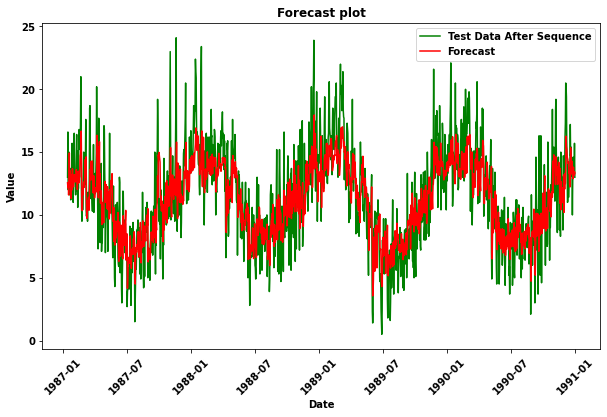

In [57]:
### BEGIN SOLUTION
data_module.single_step_plot(original_test_data = test_data_temperature,
                            sequence_test_data = output_data_temperature['test_data_output'],
                            forecast_data = prediction_temperature['test_data_prediction'],
                            test_time = test_time_temperature,
                            window_size =  window_size_temperature,
                            original_plot= False,
                            multivariate=False)
plt.xlabel(test_data_temperature.index.name)
### END SOLUTION

## Summary
In this tutorial you should have learned:

1. The flow of using CNN to perform univariate forecasting
2. The configuration of CNN and concept of it<br>

Congratulations, that concludes this lesson.<br>

Save your `transpose` function to `data_module.py` and `CNN` configuration to `deep_learning_module.py`. We will use it for other CNN tutorial.

Please proceed to other notebooks for other types of data in CNN forecasting  <br>

1. ~~*[04 - CNN-Univariate-Single - Step]*~~ *Complete*
2. [04 - CNN-Univariate-Multi-Step](./04%20-%20CNN-Univariate-Multi-Step.ipynb)<br>
3. [04 - CNN-Multivariate-Univariate-Single-Step](./04%20-%20CNN-Multivariate-Univariate-Single-Step.ipynb)<br>
4. [04 - CNN-Multivariate-Univariate-Multi-Step](./04%20-%20CNN-Multivariate-Univariate-Multi-Step.ipynb)<br>

## Reference 
1. [Deep Learning for Time Series Forecasting (Predict the Future with MLPs,CNNs and LSTMs in Python) , Jason Brownlee](https://machinelearningmastery.com/deep-learning-for-time-series-forecasting/)
2. [[CNN]Time-series Forecasting with Pytorch](https://www.kaggle.com/hanjoonchoe/cnn-time-series-forecasting-with-pytorch)
3. [PyTorch: learning conv1D,conv2D and conv3D](https://programmer.group/pytorch-learning-conv1d-conv2d-and-conv3d.html)